In [100]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from string import punctuation

import spacy
nlp = spacy.load("en_core_web_sm")

data_dir = "../../data/"
output_dir = "../../output/"

# Load Data

In [2]:

train_df = pd.read_csv(os.path.join(data_dir, "train.csv"))

train_df

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3
...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2
17303,ffddf1f,Technology has changed a lot of ways that we l...,4
17304,fff016d,If you don't like sitting around all day than ...,2
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1


In [3]:
print('Number of samples in train set:', len(train_df))

# Check for missing values
print('Number of missing values in train set:', train_df.isnull().sum().sum())

Number of samples in train set: 17307
Number of missing values in train set: 0


In [4]:
sample = train_df.sample(1)

print("Score of the sample:", sample['score'].values[0], '\n')

print("Full text of the sample:")

print(sample['full_text'].values[0])

Score of the sample: 2 

Full text of the sample:
I think that it's a Martian mesa. I think that its a just a bunch of rocks put together. If there was life there, it would probally be something else instead of the face. If there was life on mars we would have probably meet them by now and probaly do an invation. We would have found them by now if they was life. And the first picture was from a distence and could barily be seen.

Erosion probaly made it to the way it is, because on the top of Mars there is ice. The scientists took pictures over time as technology started to become for advanced. The human head was formed by shadows giving the illusion of eyes, nose and, mouth. And people couldnt even see what it really was. The sicentists can just discern thing ina a digitial image 3 time bigger than the pixel.

People can just take photos of the plantet Mars and check if there is? The Martian is the same as a butte or a mesa. They dont pass overr the Face not that often. JPL website pu

# Scores Analysis

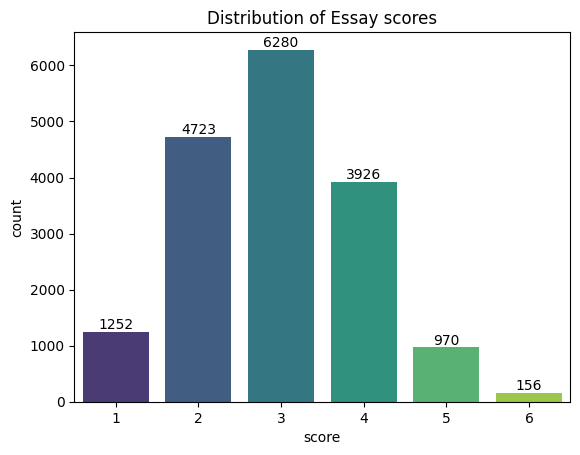

In [5]:
# plot distribution of scores
ax = sns.countplot(x="score", data=train_df, palette="viridis")

# add count on top of each bar
for p in ax.patches:
    ax.annotate(int(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.title("Distribution of Essay scores")
plt.show()

In [6]:
train_df["score"].describe()

count    17307.000000
mean         2.948402
std          1.044899
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Boxplot of Essay scores')

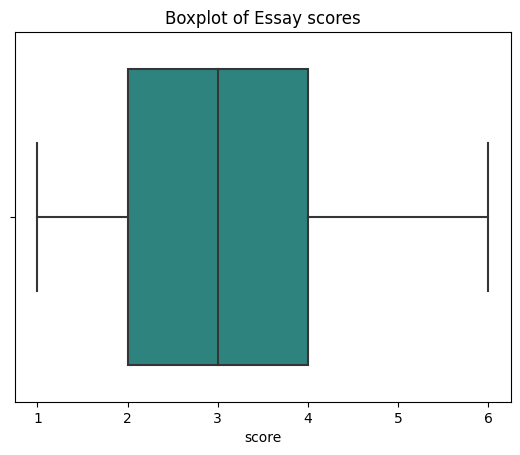

In [7]:
boxplot = sns.boxplot(x="score", data=train_df, palette="viridis")

plt.title("Boxplot of Essay scores")

# Word-scale analysis

In [8]:
def pos_features(df):
    # Create lists to hold the results
    words = []
    lemmas = []
    pos = []
    is_stop_word = []

    # Process the texts in batches
    for i, doc in enumerate(nlp.pipe(df['full_text'], batch_size=50)):
        print(f"Processing batch {i+1}/{len(df)}", end="\r")

        words.append([token.text for token in doc])
        lemmas.append([token.lemma_ for token in doc])
        pos.append([token.pos_ for token in doc])
        is_stop_word.append([token.is_stop for token in doc])

    # Assign the results to the DataFrame
    df['words'] = words
    df['lemma'] = lemmas
    df['pos'] = pos
    df['is_stop_word'] = is_stop_word

    return df


train_df = pos_features(train_df)

train_df    

,essay_id,full_text,score,words,lemma,pos,is_stop_word
0,000d118,Many people have car where they live. The thin...,3,"[Many, people, have, car, where, they, live, ....","[many, people, have, car, where, they, live, ....","[ADJ, NOUN, VERB, NOUN, SCONJ, PRON, VERB, PUN...","[True, False, True, False, True, True, False, ..."
1,000fe60,I am a scientist at NASA that is discussing th...,3,"[I, am, a, scientist, at, NASA, that, is, disc...","[I, be, a, scientist, at, NASA, that, be, disc...","[PRON, AUX, DET, NOUN, ADP, PROPN, PRON, AUX, ...","[True, True, True, False, True, False, True, T..."
2,001ab80,People always wish they had the same technolog...,4,"[People, always, wish, they, had, the, same, t...","[People, always, wish, they, have, the, same, ...","[NOUN, ADV, VERB, PRON, VERB, DET, ADJ, NOUN, ...","[False, True, False, True, True, True, True, F..."
3,001bdc0,"We all heard about Venus, the planet without a...",4,"[We, all, heard, about, Venus, ,, the, planet,...","[we, all, hear, about, Venus, ,, the, planet, ...","[PRON, PRON, VERB, ADP, PROPN, PUNCT, DET, NOU...","[True, True, False, True, False, False, True, ..."
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[Dear, ,, State, Senator, \n\n, This, is, a, l...","[dear, ,, State, Senator, \n\n, this, be, a, l...","[ADJ, PUNCT, PROPN, PROPN, SPACE, PRON, AUX, D...","[False, False, False, False, False, True, True..."
...,...,...,...,...,...,...,...
17302,ffd378d,"the story "" The Challenge of Exploing Venus "" ...",2,"[the, story, "", The, Challenge, of, Exploing, ...","[the, story, "", the, Challenge, of, Exploing, ...","[DET, NOUN, PUNCT, DET, PROPN, ADP, PROPN, PRO...","[True, False, False, True, False, True, False,..."
17303,ffddf1f,Technology has changed a lot of ways that we l...,4,"[Technology, has, changed, a, lot, of, ways, t...","[technology, have, change, a, lot, of, way, th...","[NOUN, AUX, VERB, DET, NOUN, ADP, NOUN, PRON, ...","[False, True, False, True, False, True, False,..."
17304,fff016d,If you don't like sitting around all day than ...,2,"[If, you, do, n't, like, sitting, around, all,...","[if, you, do, not, like, sit, around, all, day...","[SCONJ, PRON, AUX, PART, VERB, VERB, ADV, DET,...","[True, True, True, True, False, False, True, T..."
17305,fffb49b,"In ""The Challenge of Exporing Venus,"" the auth...",1,"[In, "", The, Challenge, of, Exporing, Venus, ,...","[in, "", the, challenge, of, Exporing, Venus, ,...","[ADP, PUNCT, DET, NOUN, ADP, PROPN, PROPN, PUN...","[True, False, True, False, True, False, False,..."


Show figures function

In [59]:
def show_box_plot(df, x, y, title=None, palette="viridis", save=False, **kwargs):
    sns.boxplot(data=df, x= x, y=y, palette=palette, **kwargs)

    if save:
        plt.savefig(f"{title}.png")
        
    plt.title(title)
    plt.show()

In [58]:
def show_hist_plot(df, x, title, save=False, **kwargs):
    sns.histplot(data=df, x=x, kde=True, **kwargs)

    if save:
        plt.savefig(f"{title}.png")
        
    plt.title(title)
    plt.show()

## Number of characters

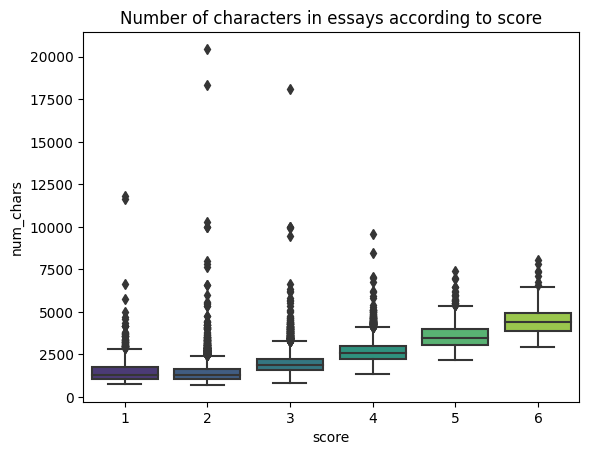

In [48]:
train_df['num_chars'] = train_df['full_text'].apply(len)

show_box_plot(train_df, 'score', 'num_chars', 'Number of characters in essays according to score')

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


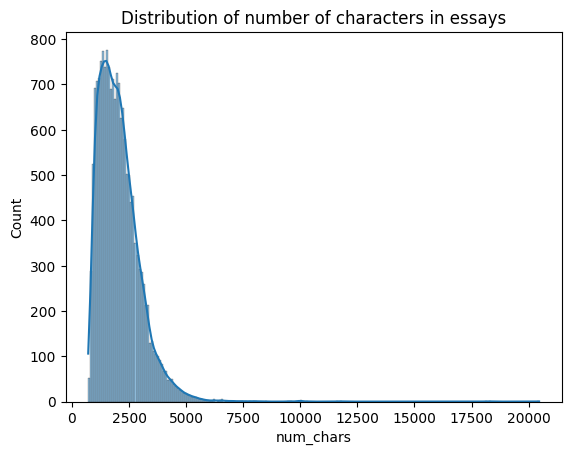

In [50]:
show_hist_plot(train_df, 'num_chars', 'Distribution of number of characters in essays')

## Number of words

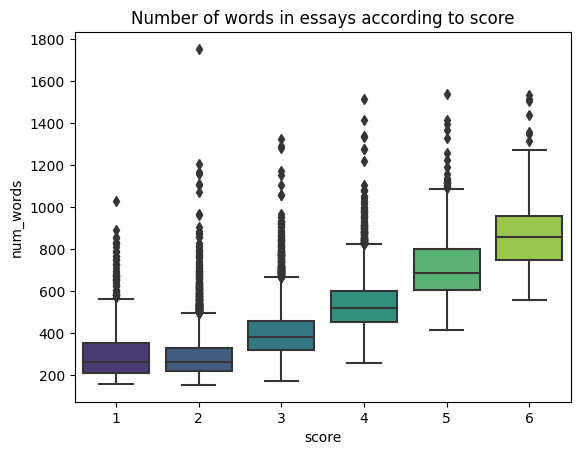

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


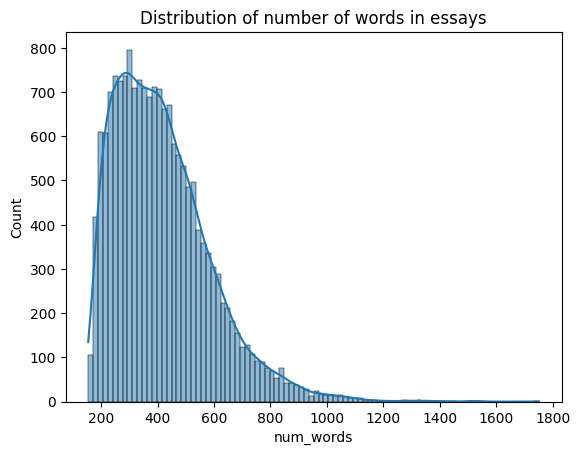

In [52]:
train_df['num_words'] = train_df['words'].apply(len)

show_box_plot(train_df, 'score', 'num_words', 'Number of words in essays according to score')

show_hist_plot(train_df, 'num_words', 'Distribution of number of words in essays')

## Number of punctuations

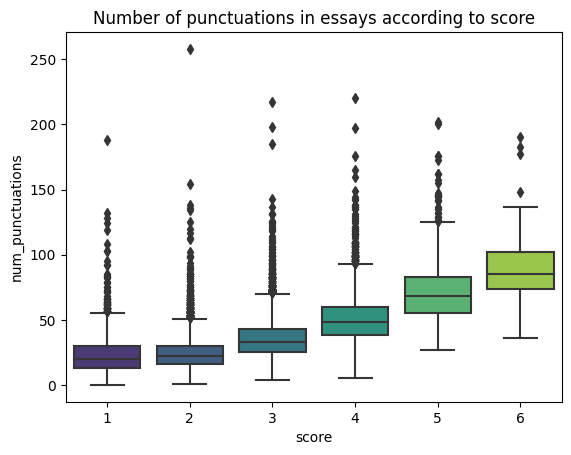

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


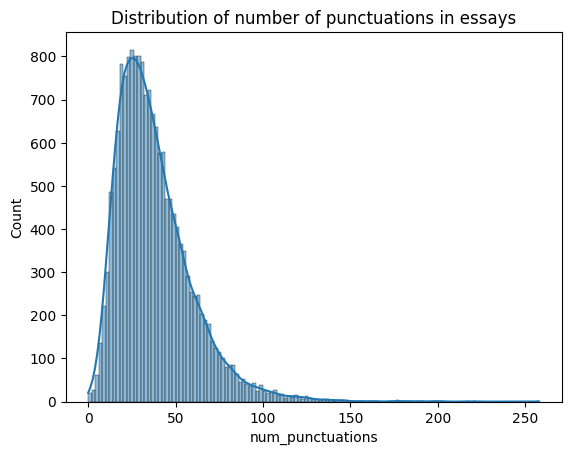

In [53]:
train_df['num_punctuations'] = train_df['pos'].apply(lambda x: len([pos for pos in x if pos == 'PUNCT']))

show_box_plot(train_df, 'score', 'num_punctuations', 'Number of punctuations in essays according to score')

show_hist_plot(train_df, 'num_punctuations', 'Distribution of number of punctuations in essays')

## Number of Nouns

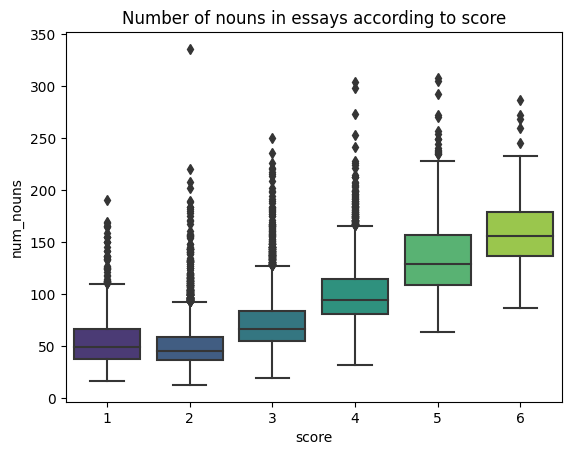

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


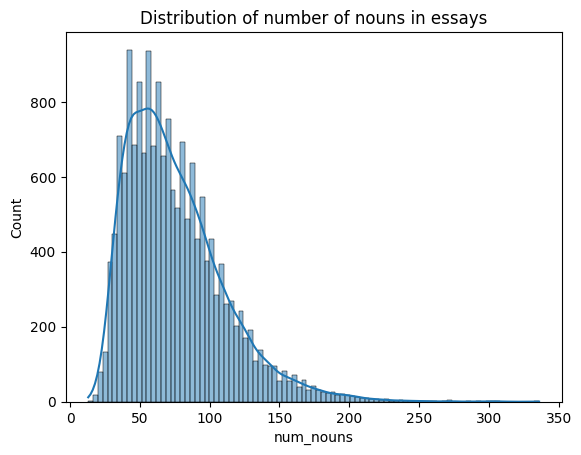

In [54]:
train_df['num_nouns'] = train_df['pos'].apply(lambda x: len([pos for pos in x if pos == 'NOUN']))

show_box_plot(train_df, 'score', 'num_nouns', 'Number of nouns in essays according to score')

show_hist_plot(train_df, 'num_nouns', 'Distribution of number of nouns in essays')

## Number of verbs

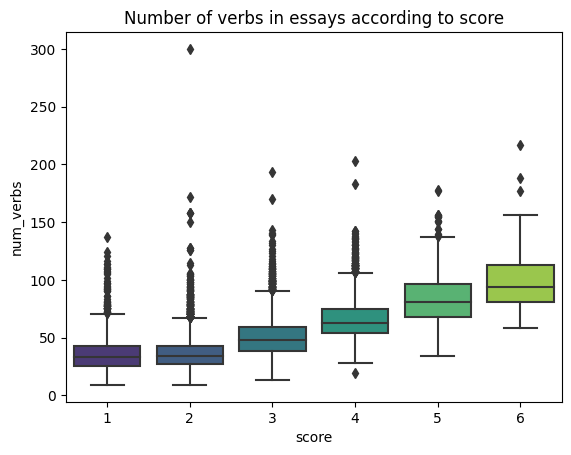

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


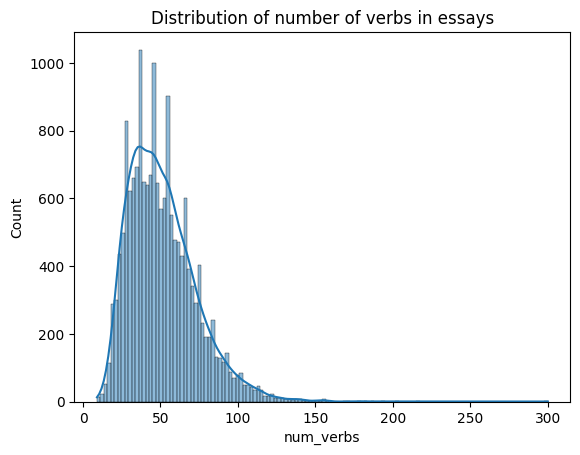

In [55]:
train_df['num_verbs'] = train_df['pos'].apply(lambda x: len([pos for pos in x if pos == 'VERB']))

show_box_plot(train_df, 'score', 'num_verbs', 'Number of verbs in essays according to score')

show_hist_plot(train_df, 'num_verbs', 'Distribution of number of verbs in essays')

## Number of adverbs

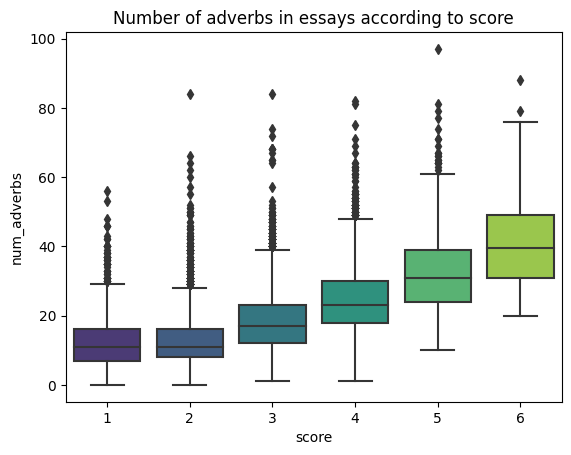

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


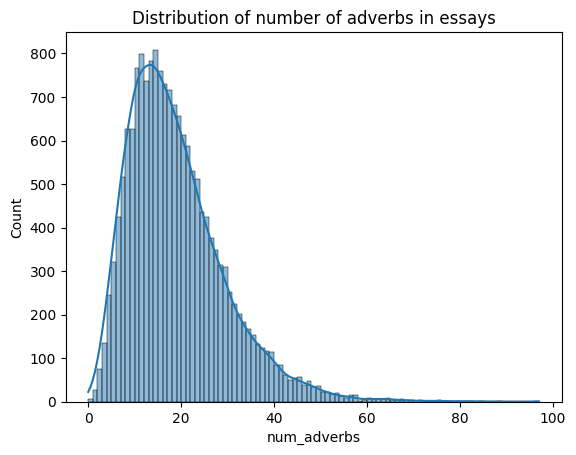

In [56]:
train_df['num_adverbs'] = train_df['pos'].apply(lambda x: len([pos for pos in x if pos == 'ADV']))

show_box_plot(train_df, 'score', 'num_adverbs', 'Number of adverbs in essays according to score')

show_hist_plot(train_df, 'num_adverbs', 'Distribution of number of adverbs in essays')

## Number of conjunctions

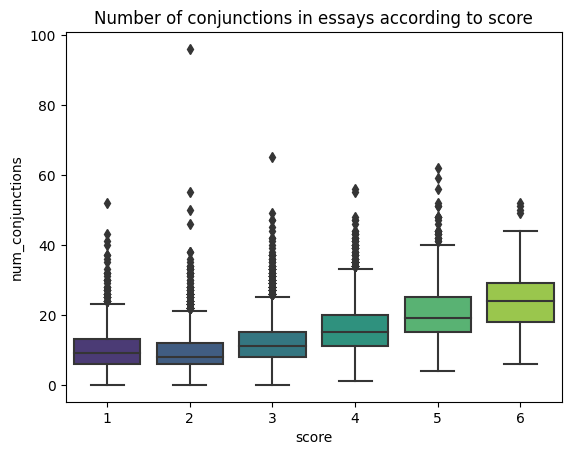

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


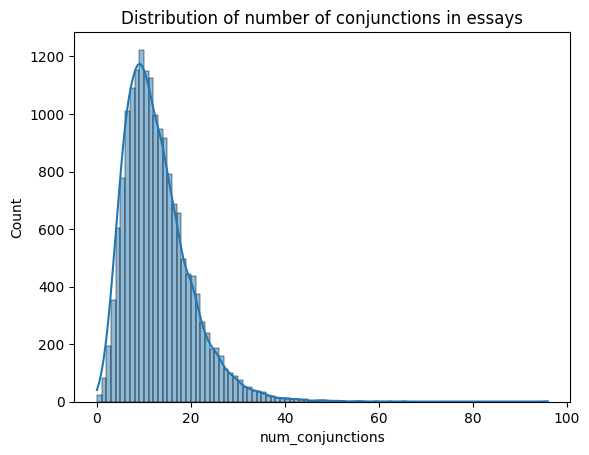

In [60]:
train_df['num_conjunctions'] = train_df['pos'].apply(lambda x: len([pos for pos in x if pos == 'CCONJ']))

show_box_plot(train_df, 'score', 'num_conjunctions', 'Number of conjunctions in essays according to score')

show_hist_plot(train_df, 'num_conjunctions', 'Distribution of number of conjunctions in essays', binwidth=1)

## Number of distinct words

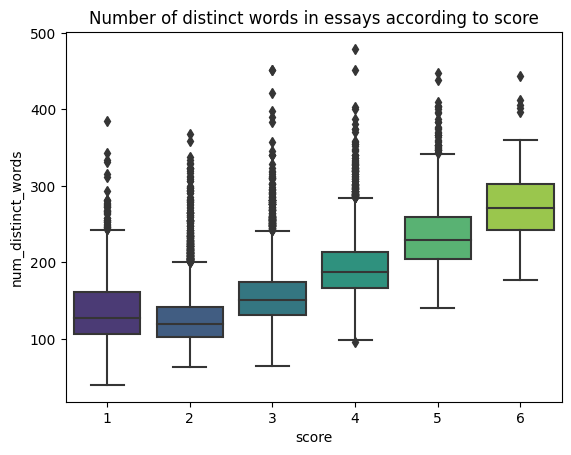

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


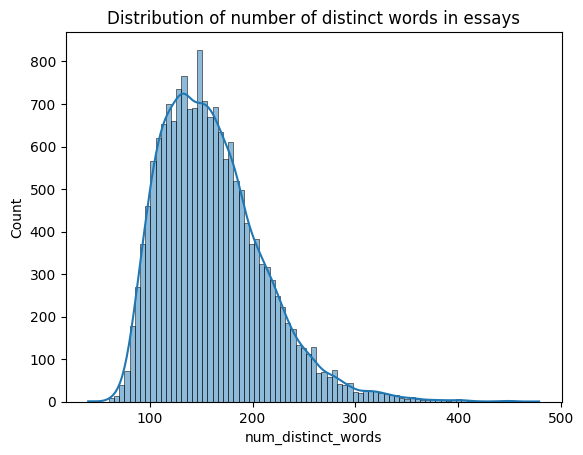

In [61]:
train_df['num_distinct_words'] = train_df['lemma'].apply(lambda x: len(set(x)))

show_box_plot(train_df, 'score', 'num_distinct_words', 'Number of distinct words in essays according to score')

show_hist_plot(train_df, 'num_distinct_words', 'Distribution of number of distinct words in essays')

## Number of misspelled words

In [26]:
from spellchecker import SpellChecker

# Initialize a spell checker
spell = SpellChecker()

def count_misspelled(words):
    words = [word for word in words if word.strip()]

    words = set(words) - {"'s", "n't"} - set(punctuation)

    return spell.unknown(words)

sample = train_df.sample(1)

print(sample['full_text'].values[0])

print(sample['words'].apply(count_misspelled).values[0])

Long ago, Vikings spotted a shadowy figure that resembled a human face. It was about two miles long and was located on a region of the Red Planet called Cydonia. Some people are convinced that aliens on the Red Planet, but others would beg to differ. Most scientists agree that aliens are just a myth and they did not build the "face. Technology has also improved the findings of scientists about he "face."

For the most part, scientists are convinced that the theory of aliens building the "face" is just a myth. They figure it is just another Martian mesa. The only unusual thing thing about this "face" is that there were shadow that give people the illusion that there are eyes, nose, and a mouth. Very few scientists fall for the myth that aliens built the ''face." Most scientists, including myself, would agree that there is no alien life after all.

Still not satisfied with my argument? If not, listen to this. With all of the new technology these days, there is even more proof as to why t

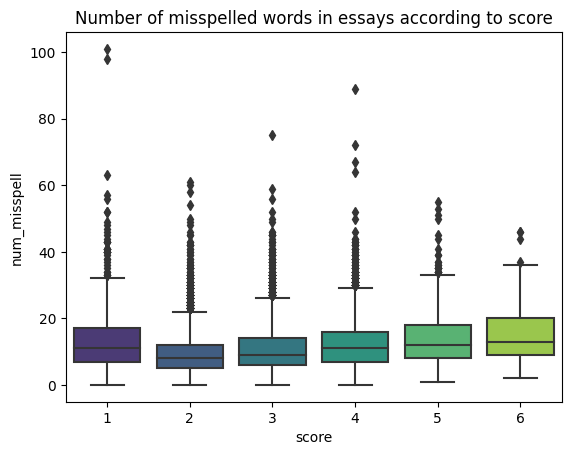

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


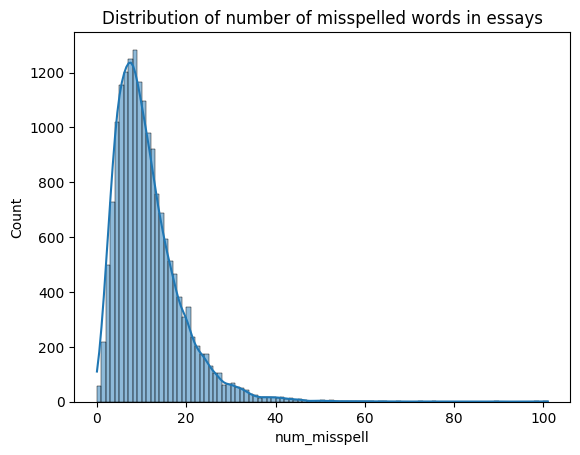

In [63]:
train_df['num_misspell'] = train_df['lemma'].apply(count_misspelled)

train_df['num_misspell'] = train_df['num_misspell'].apply(len)

show_box_plot(train_df, 'score', 'num_misspell', 'Number of misspelled words in essays according to score')

show_hist_plot(train_df, 'num_misspell', 'Distribution of number of misspelled words in essays', binwidth=1)

## Mean of word length

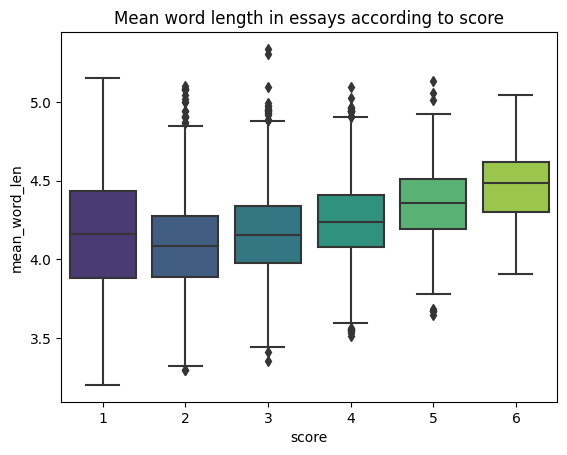

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


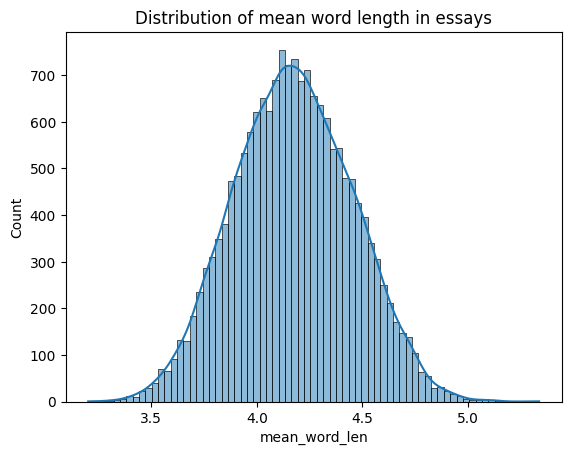

In [76]:
train_df['mean_word_len'] = train_df['lemma'].apply(lambda x: np.mean([len(word) for word in x if word.strip() and word not in punctuation]))

show_box_plot(train_df, 'score', 'mean_word_len', 'Mean word length in essays according to score')

show_hist_plot(train_df, 'mean_word_len', 'Distribution of mean word length in essays')

## Correlation between word-scale features and scores

In [79]:
corr_matrix = train_df.corr(numeric_only=True)

corr_matrix

,score,num_chars,num_words,num_punctuations,num_nouns,num_verbs,num_adverbs,num_conjunctions,num_distinct_words,num_misspell,mean_word_len
score,1.000000,0.648500,0.692587,0.611722,0.651795,0.622590,0.555755,0.457481,0.602568,0.097560,0.233286
num_chars,0.648500,1.000000,0.919880,0.762394,0.867934,0.828883,0.704241,0.671690,0.849122,0.373348,0.247886
num_words,0.692587,0.919880,1.000000,0.844875,0.920000,0.911207,0.774303,0.734740,0.906940,0.391039,0.164248
num_punctuations,0.611722,0.762394,0.844875,1.000000,0.788125,0.701438,0.613750,0.524462,0.813163,0.318063,0.247572
num_nouns,0.651795,0.867934,0.920000,0.788125,1.000000,0.799325,0.645257,0.676631,0.894932,0.423727,0.300303
num_verbs,0.622590,0.828883,0.911207,0.701438,0.799325,1.000000,0.703798,0.733175,0.787306,0.330057,0.012783
num_adverbs,0.555755,0.704241,0.774303,0.613750,0.645257,0.703798,1.000000,0.612739,0.704333,0.227073,0.031383
num_conjunctions,0.457481,0.671690,0.734740,0.524462,0.676631,0.733175,0.612739,1.000000,0.673109,0.299137,-0.000359
num_distinct_words,0.602568,0.849122,0.906940,0.813163,0.894932,0.787306,0.704333,0.673109,1.000000,0.516432,0.275855
num_misspell,0.097560,0.373348,0.391039,0.318063,0.423727,0.330057,0.227073,0.299137,0.516432,1.000000,0.111013


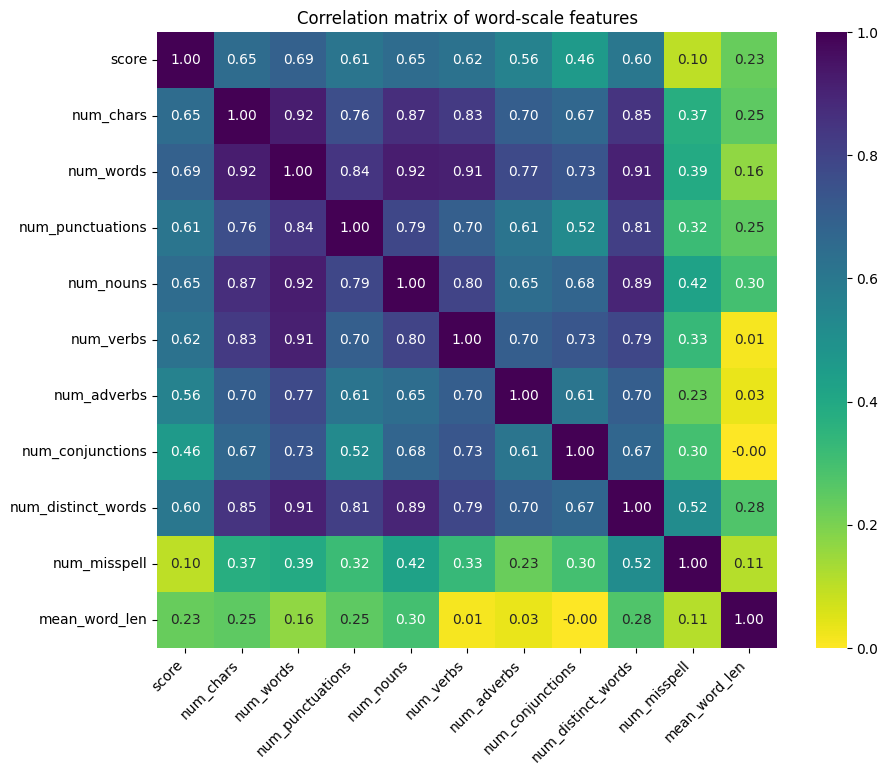

In [80]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='viridis_r', cbar=True)

plt.xticks(rotation=45, ha='right')

plt.title("Correlation matrix of word-scale features")
# Show the plot
plt.show()

In [81]:
# filter out pairs with correlation > 0.85
high_corr = corr_matrix[abs(corr_matrix) > 0.85].stack().reset_index()

high_corr = high_corr[high_corr['level_0'] != high_corr['level_1']]

# drop duplicates
high_corr = high_corr.drop_duplicates(subset=0)

high_corr = high_corr.rename(columns={0: 'correlation'})

high_corr = high_corr.sort_values(by='correlation', ascending=False).reset_index(drop=True)

high_corr

,level_0,level_1,correlation
0,num_words,num_nouns,0.920000
1,num_chars,num_words,0.919880
2,num_words,num_verbs,0.911207
3,num_words,num_distinct_words,0.906940
4,num_nouns,num_distinct_words,0.894932
5,num_chars,num_nouns,0.867934


The high_corr features are highly correlated feature (correlation > 0.85), which means they are almost linearly correlated. So we'll keep only the most correlated feature with the scores: num_words, discard the others.

# Sentence-scale analysis

In [82]:
nlp.add_pipe("sentencizer")

In [97]:
from string import printable

def get_sentences(text: str):
    # keep only printable characters
    text = "".join(filter(lambda x: x in printable, text)).strip()
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

sample = train_df.sample(1)

print(sample['full_text'].values[0])

print(get_sentences(sample['full_text'].values[0]))

He wanted to jion the program because it would be an opportunity of a life time for luke. He could travel the world see new things meet new people and make more friends when he goes to the program.

He wanted to jion the army service and help out so the told him to say in what he was doing and that he was on bored with the army. He helped take horses to greece on ship and that is hard to do with 335 horses on bored the ship,and he had to take care of them by feeding them,getting the poop up and out of there cage. When he was helping one night he almost fell off bored the ship and went into the dark Atlantic but lukly there was a melt bar that stopped he from falling off the edge of the ship.

When the horses got off the ship the men could play basketball,volleball,and table tennis with all the men on bored.

He started in 1945 with his friend from high school .When he left the army in 1947 he was glad to do all those things he had done to help all those people in need. He was als hapy 

In [98]:
train_df['sentences'] = train_df['full_text'].apply(get_sentences)

train_df.head()

,essay_id,full_text,score,words,lemma,pos,is_stop_word,num_chars,num_words,num_punctuations,num_nouns,num_verbs,num_adverbs,num_conjunctions,num_distinct_words,num_misspell,mean_word_len,sentences,num_sentences,mean_sent_len
0,000d118,Many people have car where they live. The thin...,3,"[Many, people, have, car, where, they, live, ....","[many, people, have, car, where, they, live, ....","[ADJ, NOUN, VERB, NOUN, SCONJ, PRON, VERB, PUN...","[True, False, True, False, True, True, False, ...",2677,552,31,106,66,15,19,220,24,4.003891,"[Many people have car where they live., The th...",13,205.000000
1,000fe60,I am a scientist at NASA that is discussing th...,3,"[I, am, a, scientist, at, NASA, that, is, disc...","[I, be, a, scientist, at, NASA, that, be, disc...","[PRON, AUX, DET, NOUN, ADP, PROPN, PRON, AUX, ...","[True, True, True, False, True, False, True, T...",1669,377,35,51,44,20,10,135,7,3.640118,[I am a scientist at NASA that is discussing t...,20,82.650000
2,001ab80,People always wish they had the same technolog...,4,"[People, always, wish, they, had, the, same, t...","[People, always, wish, they, have, the, same, ...","[NOUN, ADV, VERB, PRON, VERB, DET, ADJ, NOUN, ...","[False, True, False, True, True, True, True, F...",3077,611,52,115,69,44,15,213,7,4.276173,[People always wish they had the same technolo...,25,122.240000
3,001bdc0,"We all heard about Venus, the planet without a...",4,"[We, all, heard, about, Venus, ,, the, planet,...","[we, all, hear, about, Venus, ,, the, planet, ...","[PRON, PRON, VERB, ADP, PROPN, PUNCT, DET, NOU...","[True, True, False, True, False, False, True, ...",2701,516,54,113,57,19,21,220,8,4.599129,"[We all heard about Venus, the planet without ...",21,127.857143
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,"[Dear, ,, State, Senator, \n\n, This, is, a, l...","[dear, ,, State, Senator, \n\n, this, be, a, l...","[ADJ, PUNCT, PROPN, PROPN, SPACE, PRON, AUX, D...","[False, False, False, False, False, True, True...",2208,428,37,76,35,9,9,138,11,4.498688,"[Dear, State Senator\n\nThis is a letter to ar...",16,137.437500


In [102]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

train_df.to_csv(os.path.join(output_dir, "train_linguisitc.csv"), index=False)

## Number of sentences

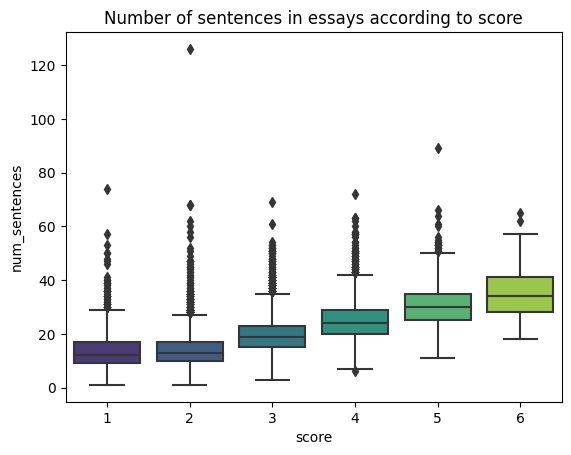

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


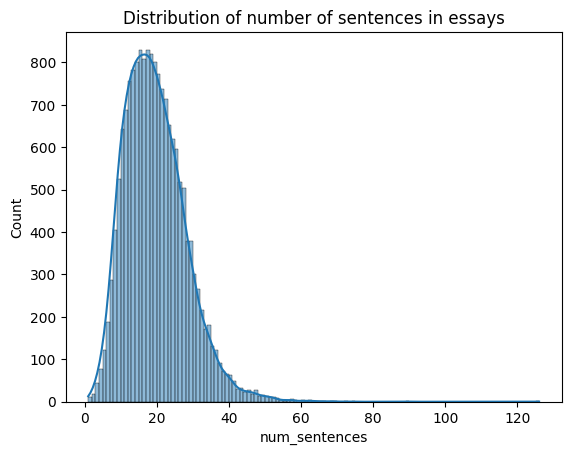

In [103]:
train_df['num_sentences'] = train_df['sentences'].apply(len)

show_box_plot(train_df, 'score', 'num_sentences', 'Number of sentences in essays according to score')

show_hist_plot(train_df, 'num_sentences', 'Distribution of number of sentences in essays', binwidth=1)

## The average sentence length

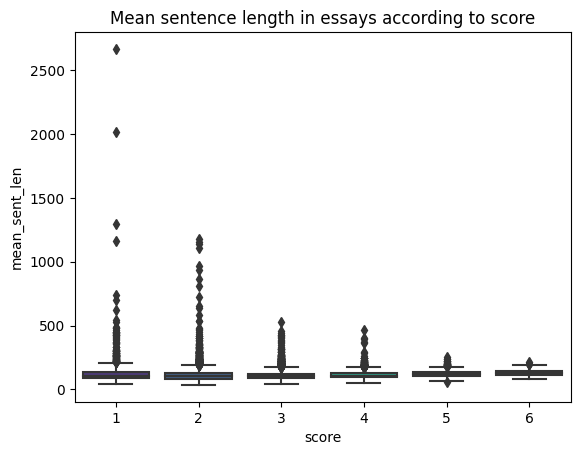

c:\Users\Minh Ha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


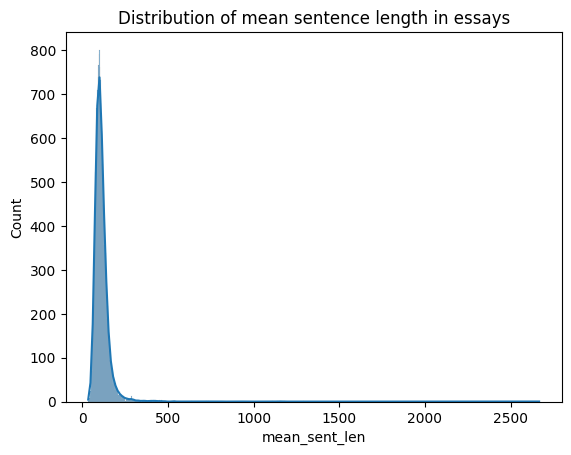

In [104]:
train_df['mean_sent_len'] = train_df['sentences'].apply(lambda x: np.mean([len(sent) for sent in x]))

show_box_plot(train_df, 'score', 'mean_sent_len', 'Mean sentence length in essays according to score')

show_hist_plot(train_df, 'mean_sent_len', 'Distribution of mean sentence length in essays')

In [105]:
train_df['mean_sent_len'].describe()

count    17307.000000
mean       112.262834
std         53.032329
min         34.603175
25%         87.535897
50%        104.173913
75%        125.433036
max       2667.000000
Name: mean_sent_len, dtype: float64

In [106]:
train_df[train_df['mean_sent_len'] == train_df['mean_sent_len'].max()]['full_text'].values[0]

'if i had to choose i would change to election vote\xa0 cause it is more popular and it has less problems unlike the other\xa0 cause when you do electoral college you have to do lots ofdifferent things that is not worth doing which is a disaster for some people and while other people are saying how good the electoral college is if its so good why do you so many issues with things that happen to people thats what i dont understand they dont let some people vote cause there age which is stupid they should\xa0 let them vote thats the reason why ther areso many disputes in the world cause of the ignorance of some people and the only thing the people from electoral college is worried about iswinning instead of carring for the other people which is not right that is the reason so many outbreaks happen cause people start to not even give a crap about the people that is wanting to vote but the people is not worriedtwo cents about what anyone else thinks their just worried bout\xa0 themselves w

In [109]:
train_df[train_df['num_chars'] == train_df['num_chars']]['full_text'].values[0]

'Many people have car where they live. The thing they don\'t know is that when you use a car alot of thing can happen\xa0like you can get in accidet or\xa0the smoke that the car has is bad to breath\xa0on if someone is walk but in VAUBAN,Germany they dont have that proble because 70 percent of vauban\'s families do not own cars,and 57 percent sold a car to move there. Street parkig ,driveways and home garages are forbidden\xa0on the outskirts of freiburd that near the French and Swiss borders. You probaly won\'t see a car in Vauban\'s streets because they are completely "car free" but\xa0If some that lives in VAUBAN that owns a car ownership is allowed,but there are only two places that you can park a large garages at the edge of the development,where a car owner buys a space but it not cheap to buy one they sell the space for you car for $40,000 along with a home. The vauban people completed this in 2006 ,they said that this an example of a growing trend in Europe,The untile states an